# Markov Chain Monte Carlo with Couplings

## Libraries importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
#from mpmath import mp
import math

from tensorflow_probability.substrates import numpy as tfp
#tfd = tfp.distributions

## Functions importing

In [2]:
from auxiliary_functions import maximal_coupling, metropolis_hastings

2021-12-02 16:39:09.135676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-02 16:39:09.135700: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Setting and importing distributions

In [3]:
from settings_distributions import lik, pi0, target, y_obs

## Execution

### using Metropolis Hastings algorithm

In [ ]:
x_start = 48
y_start = 40

iterations =1000


(rossocatena, bluechain) = metropolis_hastings(x_start, y_start, iterations)
plt.hist(rossocatena[400:], bins=30)

In [ ]:
plt.plot(rossocatena)
plt.plot(bluechain)

Check this for intersect1d https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html

In [ ]:
values = np.intersect1d(rossocatena, bluechain)

In [ ]:
plt.plot(values)

In [ ]:
values.size

In [ ]:
plt.hist(values)

### Multiple sequential execution

In [ ]:
x_start = 48
y_start = 40

iterations =1000

batch = 5
sampling = np.empty(1)

for i in range(batch):
    (rossocatena, bluechain) = metropolis_hastings(x_start, y_start, iterations)
    sampling = np.append(
        sampling, 
        np.intersect1d(rossocatena, bluechain)
    )
    print("fatto " + str(i+1))

plt.plot(sampling)
plt.hist(sampling)

In [ ]:
sampling

In [ ]:
a = np.array([0,1,2])
np.append(a, np.array([0,3,4]))

### Multiprocessing

In [4]:
from multiprocessing import Process, Queue
import os

num_processes = os.cpu_count()
print(num_processes)

8


In [6]:
num_batches_set = 24
#num_steps = int(math.ceil(num_batches / num_processes))
#num_steps


In [7]:
q = Queue()

x_start = 48
y_start = 40
iterations =1000  

In [8]:
def MH_intersect(queue, x_start, y_start, iterations):
    (rossocatena, bluechain) = metropolis_hastings(x_start, y_start, iterations)
    queue.put(
        np.intersect1d(rossocatena, bluechain)
    )

In [9]:
samplings = np.empty(0)

num_batches = num_batches_set
while num_batches > 0:
    
    print("There are " + str(num_batches) + " left")
    
    processes = []
          
    
    if num_batches >= num_processes:
        current_number = num_processes
    else:
        current_number = num_batches

    for batch in range(current_number):
        p = Process(
            target = MH_intersect, 
            args = (q, x_start, y_start, iterations)
        )
        processes.append(p)

    for p in processes:
        p.start()

    for p in processes:
        p.join()

    
    while not q.empty():
        samplings = np.append(
            samplings, 
            q.get()
        )
    
    num_batches -= num_processes

There are 24 left
There are 16 left
There are 8 left


In [10]:
samplings.size

4776

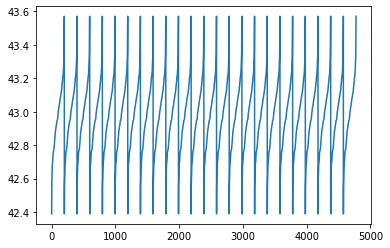

In [11]:
plt.plot(samplings)

(array([  24.,  120.,  384.,  768., 1008., 1104.,  888.,  360.,   72.,
          48.]),
 array([42.38907806, 42.50725207, 42.62542608, 42.74360008, 42.86177409,
        42.9799481 , 43.0981221 , 43.21629611, 43.33447011, 43.45264412,
        43.57081813]),
 <BarContainer object of 10 artists>)

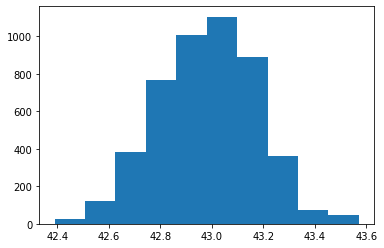

In [12]:
plt.hist(samplings)

In [11]:
samplings.size

3547

In [15]:

hola = np.empty(0)
hola

array([], dtype=float64)

In [ ]:
processes = []

for i in range(num_processes):
    p = Process(target = SquareNumbers)
    processes.append(p)
    

In [ ]:
sampling